In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('cleaned_file.csv')

# Keep only the first 100 rows
df_truncated = df.head(100)

# Save the truncated dataset back to a CSV file
df_truncated.to_csv('truncated_file.csv', index=False)


In [ ]:
df_truncated

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,is_crime,is_traffic,victim_count
0,202268791,202268791299900,2999,0,criminal-mischief-other,public-disorder,2/10/2022 2:50:00 AM,NaN,2/10/2022 3:16:00 AM,1107 N SANTA FE DR,3140929.0,1692612.0,-104.998910,39.733957,1,123.0,lincoln-park,1.0,0.0,1.0
1,2021387586,2021387586299900,2999,0,criminal-mischief-other,public-disorder,7/7/2021 9:02:00 PM,NaN,7/8/2021 12:55:00 AM,815 16TH ST,3142470.0,1697098.0,-104.993342,39.746248,6,611.0,cbd,1.0,0.0,1.0
2,2020641486,2020641486299900,2999,0,criminal-mischief-other,public-disorder,10/29/2020 1:30:00 AM,NaN,10/29/2020 4:31:00 AM,4745 N FEDERAL BLVD,3133352.0,1710396.0,-105.025520,39.782888,1,111.0,berkeley,1.0,0.0,1.0
3,2018612468,2018612468299900,2999,0,criminal-mischief-other,public-disorder,9/6/2018 5:00:00 PM,9/6/2018 11:00:00 PM,9/7/2018 9:58:00 AM,65 S FEDERAL BLVD,3133534.0,1685797.0,-105.025330,39.715357,4,411.0,barnum,1.0,0.0,1.0
4,2020293614,2020293614299900,2999,0,criminal-mischief-other,public-disorder,5/8/2020 5:00:00 AM,5/8/2020 6:30:00 PM,5/13/2020 10:00:00 AM,12295 E ALBROOK DR,3184065.0,1710782.0,-104.845074,39.783082,5,521.0,montbello,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019335660,2019335660299900,2999,0,criminal-mischief-other,public-disorder,5/29/2019 7:20:00 PM,NaN,5/29/2019 7:58:00 PM,1295 N YORK ST,3151827.0,1693663.0,-104.960140,39.736670,6,622.0,cheesman-park,1.0,0.0,1.0
96,20206006653,20206006653299900,2999,0,criminal-mischief-other,public-disorder,6/3/2020 1:30:00 AM,6/3/2020 1:35:00 AM,6/3/2020 9:47:00 AM,1655 N GRANT ST,3145105.0,1695865.0,-104.983997,39.742823,6,621.0,north-capitol-hill,1.0,0.0,1.0
97,2018206602,2018206602299900,2999,0,criminal-mischief-other,public-disorder,3/12/2018 8:00:00 AM,3/28/2018 8:00:00 AM,3/28/2018 4:00:00 PM,3284 N NEWTON ST,3130272.0,1703380.0,-105.036606,39.763672,1,113.0,west-highland,1.0,0.0,1.0
98,2021334418,2021334418299900,2999,0,criminal-mischief-other,public-disorder,6/13/2021 2:30:00 AM,NaN,6/13/2021 2:33:00 AM,1331 N SPEER BLVD,3141191.0,1693918.0,-104.997953,39.737538,1,123.0,lincoln-park,1.0,0.0,1.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your new dataset
file_path = '/content/truncated_file.csv'
crime_data = pd.read_csv(file_path, encoding='latin1')


In [ ]:
!pip3 install -q -U bitsandbytes==0.42.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate==0.27.1
!pip3 install -q -U datasets==2.17.0
!pip3 install -q -U transformers==4.38.0
import os
import transformers
import torch
from google.colab import userdata
from datasets import load_dataset
from trl import SFTTrainer
from peft import LoraConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig, GemmaTokenizer
import os
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict
import torch

# Load the dataset
file_path = '/content/truncated_file.csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Clean and encode dates (if needed)
def clean_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Encode categorical columns
def encode_categorical(df, columns):
    le_dict = {}
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le
    return df, le_dict

# Columns to be cleaned and encoded
date_columns = ['first_occurrence_date', 'last_occurrence_date', 'reported_date']
categorical_columns = ['offense_type_id', 'offense_category_id', 'incident_address', 'neighborhood_id']

# Clean dates
df_cleaned = clean_dates(df.copy(), date_columns)

# Encode categorical columns
df_encoded, label_encoders = encode_categorical(df_cleaned, categorical_columns)

# Combine text fields into a single column
df_encoded['text'] = df_encoded['offense_type_id'].astype(str) + ' ' + df_encoded['offense_category_id'].astype(str) + ' ' + df_encoded['incident_address'].astype(str)

# Split the data into features and target
X = df_encoded['text']
y = df_encoded['is_crime']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to pandas DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

# Fine-tuning code
class LoRA(torch.nn.Module):
    def __init__(self, model, rank=8, alpha=32):
        super().__init__()
        self.model = model
        self.rank = rank
        self.alpha = alpha
        self.low_rank_matrices = {}
        for name, param in model.named_parameters():
            if "weight" in name and param.ndim == 2:
                self.low_rank_matrices[name] = torch.nn.Parameter(
                    torch.zeros((param.size(0), self.rank))
                )
                torch.nn.init.normal_(self.low_rank_matrices[name], std=1/self.rank)
                self.model.register_parameter(f"{name}_lora", self.low_rank_matrices[name])

    def forward(self, *inputs, **kwargs):
        for name, param in self.model.named_parameters():
            if name in self.low_rank_matrices:
                param.data += self.alpha * torch.mm(
                    self.low_rank_matrices[name], param.data
                )
        return self.model(*inputs, **kwargs)

# Load model
model_name = "bert-base-uncased"  # Replace with the actual GEMMA model name if different
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
lora_model = LoRA(model)

# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Set up Trainer
trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

# Function to make predictions on a single query
def predict(model, tokenizer, text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=512)
    outputs = model(**inputs)
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return predictions

# Example query
query = "criminal-mischief-other public-disorder 1107 N SANTA FE DR"
predictions = predict(lora_model, tokenizer, query)
predictions


<ipython-input-14-9976fb69296c>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


KeyError: 'parameter name can\'t contain "."'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict
import torch
import os

# Load the dataset
file_path = '/content/truncated_file.csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Clean and encode dates (if needed)
def clean_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Encode categorical columns
def encode_categorical(df, columns):
    le_dict = {}
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        le_dict[col] = le
    return df, le_dict

# Columns to be cleaned and encoded
date_columns = ['first_occurrence_date', 'last_occurrence_date', 'reported_date']
categorical_columns = ['offense_type_id', 'offense_category_id', 'incident_address', 'neighborhood_id']

# Clean dates
df_cleaned = clean_dates(df.copy(), date_columns)

# Encode categorical columns
df_encoded, label_encoders = encode_categorical(df_cleaned, categorical_columns)

# Combine text fields into a single column
df_encoded['text'] = df_encoded['offense_type_id'].astype(str) + ' ' + df_encoded['offense_category_id'].astype(str) + ' ' + df_encoded['incident_address'].astype(str)

# Split the data into features and target
X = df_encoded['text']
y = df_encoded['is_crime']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to pandas DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('google/gemma-2b')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)


<ipython-input-18-4e961d98b5da>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/20 [00:00<?, ? examples/s]

In [ ]:
!pip install openpyxl


In [ ]:
import openpyxl

# Load the workbook and select the active sheet
workbook = openpyxl.load_workbook('crime.csv')
sheet = workbook.active

# Iterate through the first 150 columns
for col in range(1, 151):
    for row in range(1, sheet.max_row + 1):
        cell = sheet.cell(row=row, column=col)
        # Perform your operations here
        print(cell.value)

# Save the workbook if any changes were made
# workbook.save('yourfile_modified.xlsx')


InvalidFileException: openpyxl does not support .csv file format, please check you can open it with Excel first. Supported formats are: .xlsx,.xlsm,.xltx,.xltm

In [ ]:
!pip install openpyxl

import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/cleaned_file.csv')

# Keep only the first 100 rows
df_truncated = df.head(100)

# Save the truncated dataset to an Excel file
df_truncated.to_excel('truncated_file.xlsx', index=False)

import openpyxl

# Load the Excel file
workbook = openpyxl.load_workbook('truncated_file.xlsx')

# Access the sheet
sheet = workbook.active

# Iterate through the first 150 columns
for col in range(1, 151):
    for row in range(1, sheet.max_row + 1):
        cell = sheet.cell(row=row, column=col)
        # Perform your operations here
        print(cell.value)

# Save the workbook if any changes were made
# workbook.save('yourfile_modified.xlsx')

Streaming output truncated to the last 5000 lines.
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None

In [15]:
import pandas as pd

def xlsx_to_csv(input_file, output_file):
    try:
        # Load the Excel file
        df = pd.read_excel('/content/Wind Speed Data_CY 2011 (1).xlsx')

        # Save as CSV
        df.to_csv(output_file, index=False, encoding='utf-8-sig')

        print(f'Conversion successful! CSV file saved as {output_file}')

    except Exception as e:
        print(f'Error converting {input_file} to CSV: {e}')

# Replace 'input.xlsx' and 'output.csv' with your file paths
xlsx_to_csv('input.xlsx', 'output.csv')


Conversion successful! CSV file saved as output.csv


In [ ]:
import pandas as pd

# Load the CSV file, skipping bad lines
df = pd.read_csv('crime.csv', on_bad_lines='skip')

# Save the cleaned dataset back to a CSV file
df.to_csv('cleaned_file.csv', index=False)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


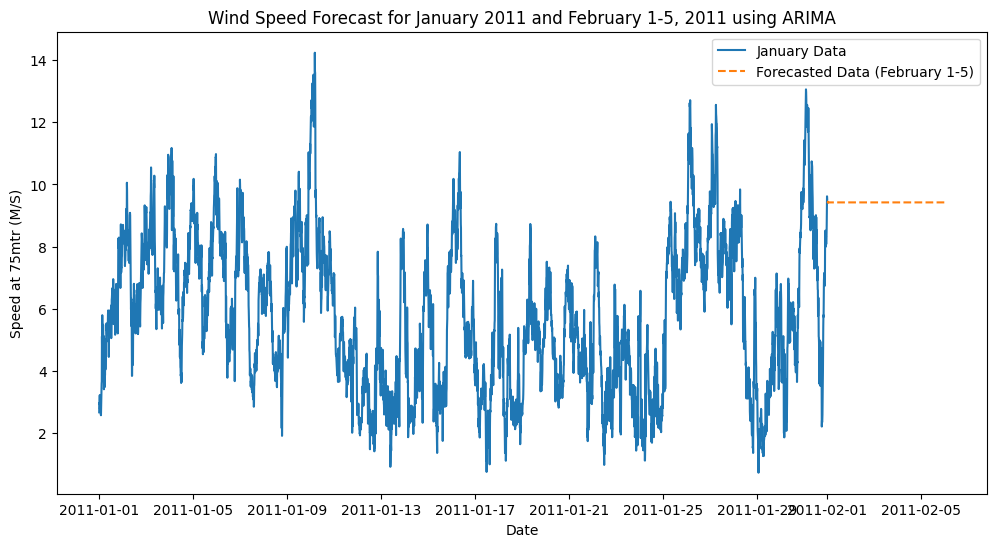

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pmdarima as pm

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data

# Use auto_arima to find the best order for ARIMA


# Fit ARIMA model on training data
arima_model = ARIMA(train_data['Speed at 75mtr'], order=(2, 1, 2))
arima_result = arima_model.fit()

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6
forecast_arima = arima_result.get_forecast(steps=forecast_steps)
forecast_arima_df = forecast_arima.conf_int(alpha=0.05)
forecast_arima_df['Speed at 75mtr'] = forecast_arima.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 5)
forecast_index = pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T')
forecast_arima_df.index = forecast_index

# Plot the actual vs forecasted values for January and forecasted February
plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(forecast_arima_df.index, forecast_arima_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')

plt.title('Wind Speed Forecast for January 2011 and February 1-5, 2011 using ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


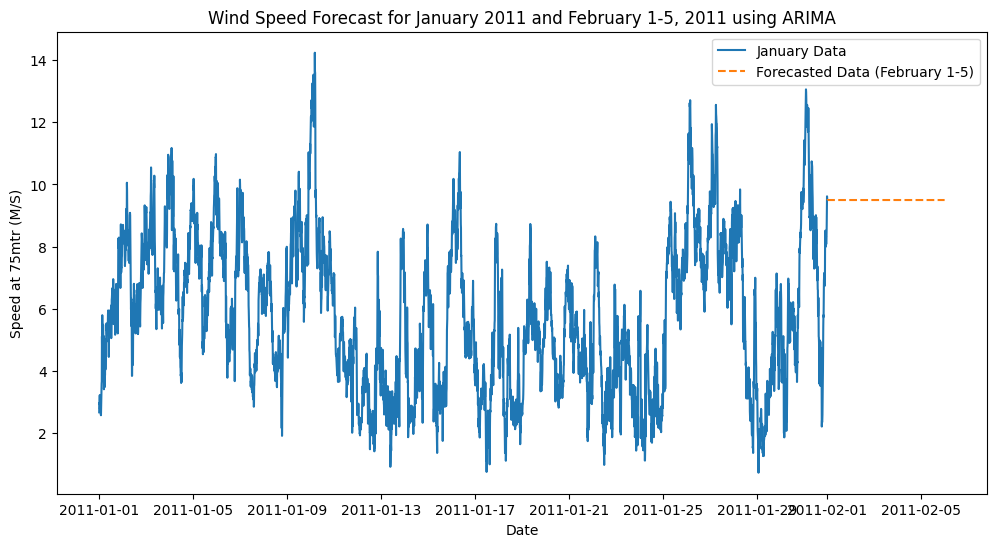

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data

# Fit ARIMA model on training data
arima_model = ARIMA(train_data['Speed at 75mtr'], order=(2, 1, 0))
arima_result = arima_model.fit()

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6 (10-minute intervals per hour)
forecast_arima = arima_result.get_forecast(steps=forecast_steps)
forecast_arima_df = forecast_arima.conf_int(alpha=0.05)
forecast_arima_df['Speed at 75mtr'] = forecast_arima.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 5)
forecast_index = pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T')
forecast_arima_df.index = forecast_index

# Plot the actual January data and forecasted February 1-5 data
plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(forecast_arima_df.index, forecast_arima_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')

plt.title('Wind Speed Forecast for January 2011 and February 1-5, 2011 using ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


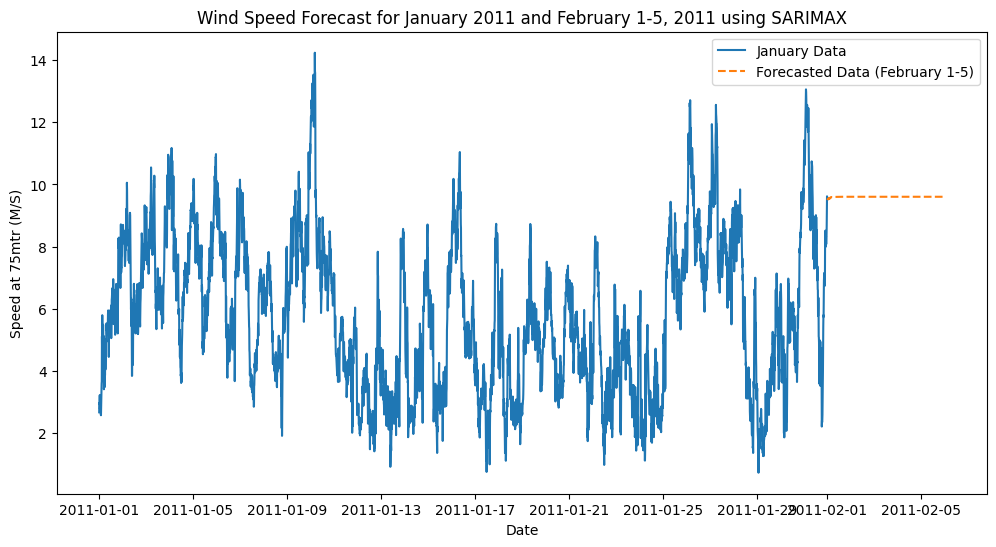

In [31]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data

# Fit SARIMAX model on training data
sarimax_model = SARIMAX(train_data['Speed at 75mtr'], order=(2, 1, 0), seasonal_order=(1, 0, 1, 24))  # Using seasonal_order for daily seasonality (24 hours)
sarimax_result = sarimax_model.fit(disp=False)

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6 (10-minute intervals per hour)
forecast_sarimax = sarimax_result.get_forecast(steps=forecast_steps)
forecast_sarimax_df = forecast_sarimax.conf_int(alpha=0.05)
forecast_sarimax_df['Speed at 75mtr'] = forecast_sarimax.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 5)
forecast_index = pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T')
forecast_sarimax_df.index = forecast_index

# Plot the actual January data and forecasted February 1-5 data
plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(forecast_sarimax_df.index, forecast_sarimax_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')

plt.title('Wind Speed Forecast for January 2011 and February 1-5, 2011 using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


In [54]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data['Speed at 75mtr']

# Fit Auto-ARIMA model on training data
autoarima_model = auto_arima(train_data, seasonal=True, m=144, trace=True)  # m=144 for daily seasonality (24 hours * 6 intervals per hour)
autoarima_model.fit(train_data)

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6 (10-minute intervals per hour)
forecast_autoarima, conf_int = autoarima_model.predict(n_periods=forecast_steps, return_conf_int=True)
forecast_autoarima_df = pd.DataFrame(forecast_autoarima, index=pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T'), columns=['Speed at 75mtr'])
forecast_autoarima_df['Lower Bound'] = conf_int[:, 0]
forecast_autoarima_df['Upper Bound'] = conf_int[:, 1]

# Plot the actual January data and forecasted February 1-5 data
plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(forecast_autoarima_df.index, forecast_autoarima_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')
plt.fill_between(forecast_autoarima_df.index, forecast_autoarima_df['Lower Bound'], forecast_autoarima_df['Upper Bound'], color='gray', alpha=0.2)

plt.title('Wind Speed Forecast for January 2011 and February 1-5, 2011 using Auto-ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the Excel file
file_path = '/content/output.csv'
data = pd.read_csv(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data['Speed at 75mtr']
test_data=february_data['Speed at 75mtr']

# Fit the MinMaxScaler on the training data
scaler = MinMaxScaler()
scaler.fit(train_data.values.reshape(-1, 1))

# Transform the train and test data using the fitted scaler
scaled_train_data = scaler.transform(train_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

In [63]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20


<ipython-input-65-dcd31fc91329>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  lstm_model.fit_generator(generator,epochs=20)


4452/4452 [==============================] - 89s 20ms/step - loss: 0.0029
Epoch 2/20
4452/4452 [==============================] - 67s 15ms/step - loss: 0.0017
Epoch 3/20
4452/4452 [==============================] - 68s 15ms/step - loss: 0.0015
Epoch 4/20
4452/4452 [==============================] - 66s 15ms/step - loss: 0.0015
Epoch 5/20
4452/4452 [==============================] - 70s 16ms/step - loss: 0.0015
Epoch 6/20
4452/4452 [==============================] - 69s 15ms/step - loss: 0.0015
Epoch 7/20
4452/4452 [==============================] - 68s 15ms/step - loss: 0.0014
Epoch 8/20
4452/4452 [==============================] - 70s 16ms/step - loss: 0.0014
Epoch 9/20
4452/4452 [==============================] - 66s 15ms/step - loss: 0.0015
Epoch 10/20
4452/4452 [==============================] - 68s 15ms/step - loss: 0.0014
Epoch 11/20
4452/4452 [==============================] - 68s 15ms/step - loss: 0.0014
Epoch 12/20
4452/4452 [==============================] - 69s 16ms/step - l

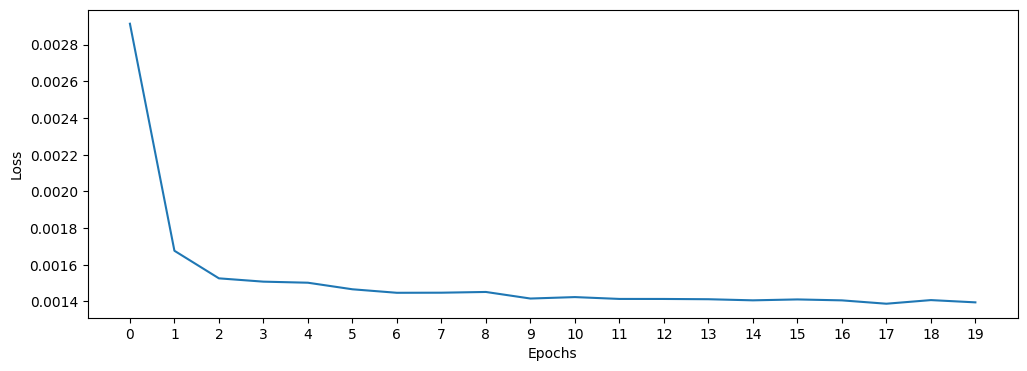

In [66]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [67]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 25ms/step


In [68]:

lstm_predictions_scaled

[array([0.63697], dtype=float32),
 array([0.6273591], dtype=float32),
 array([0.61815417], dtype=float32),
 array([0.6088496], dtype=float32),
 array([0.5993973], dtype=float32),
 array([0.58984715], dtype=float32),
 array([0.58027583], dtype=float32),
 array([0.57069075], dtype=float32),
 array([0.56111443], dtype=float32),
 array([0.55156666], dtype=float32),
 array([0.5420532], dtype=float32),
 array([0.5325495], dtype=float32),
 array([0.52304786], dtype=float32),
 array([0.51355296], dtype=float32),
 array([0.5040664], dtype=float32),
 array([0.49458814], dtype=float32),
 array([0.4851179], dtype=float32),
 array([0.47565597], dtype=float32),
 array([0.46629202], dtype=float32),
 array([0.4570762], dtype=float32),
 array([0.44797754], dtype=float32),
 array([0.43898302], dtype=float32),
 array([0.43008697], dtype=float32),
 array([0.42128778], dtype=float32),
 array([0.41258574], dtype=float32),
 array([0.40398186], dtype=float32),
 array([0.3954779], dtype=float32),
 array([0.387

In [69]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [70]:
lstm_predictions

array([[9.33146448],
       [9.20162134],
       [9.07726281],
       ...,
       [1.74307009],
       [1.74307009],
       [1.74307009]])

In [71]:
test_data['LSTM_Predictions'] = lstm_predictions

In [72]:
test_data

Timestamp
2011-02-01 00:00:00                                                9.775
2011-02-01 00:10:00                                                9.535
2011-02-01 00:20:00                                                9.504
2011-02-01 00:30:00                                               10.034
2011-02-01 00:40:00                                               10.021
                                             ...                        
2011-02-28 23:20:00                                                7.149
2011-02-28 23:30:00                                                7.345
2011-02-28 23:40:00                                                7.695
2011-02-28 23:50:00                                                8.333
LSTM_Predictions       [[9.33146447813511], [9.201621336102487], [9.0...
Name: Speed at 75mtr, Length: 4033, dtype: object

In [74]:
test_data['Timestamp'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

KeyError: 'Timestamp'

In [ ]:
lstm_rmse_error = rmse(test_data[''], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

In [50]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:

df=pd.read_excel('/content/Wind Speed Data_CY 2011 edited.xlsx')
sales_data=df[['Date & Time Stamp','Speed at 75mtr']]
sales_data=pd.DataFrame(sales_data)
sales_data['Date & Time Stamp']=pd.to_datetime(sales_data['Order Date'])
print(sales_data.head())

KeyError: "None of [Index(['Date & Time Stamp', 'Speed at 75mtr'], dtype='object')] are in the [columns]"

In [35]:
df=pd.read_excel('/content/Wind Speed Data_CY 2011 (1).xlsx')
df.head()

,Wind speed data (M/S),Unnamed: 1
0,NaN,NaN
1,Date & Time Stamp,Speed at 75mtr
2,2011-01-01 00:00:00,2.669
3,2011-01-01 00:10:00,2.965
4,2011-01-01 00:20:00,2.939


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df=pd.read_excel('/content/Wind Speed Data_CY 2011 (1).xlsx')
df.head()

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Speed at 75 mtr'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

KeyError: 'Speed at 75 mtr'

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52550 entries, 0 to 52549
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Wind speed data (M/S)  52549 non-null  object
 1   Unnamed: 1             52549 non-null  object
dtypes: object(2)
memory usage: 821.2+ KB


In [41]:
auto_arima(df['Wind speed data (M/S)'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

ValueError: could not convert string to float: 'Date & Time Stamp'

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


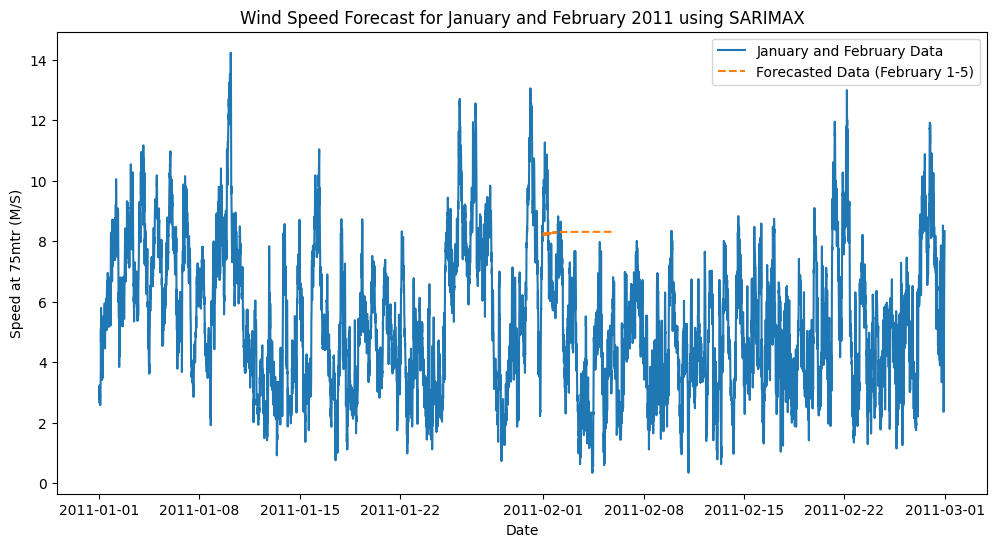

In [32]:
# prompt: in the above plot why the forecast is giving a straight line instead of oscillations do the necessary changes to get the optimal plot

import pandas as pd
import matplotlib.pyplot as plt
# Use all of January and February data for training
train_data = pd.concat([january_data, february_data])

# Fit SARIMAX model on training data
sarimax_model = SARIMAX(train_data['Speed at 75mtr'], order=(2, 1, 0), seasonal_order=(1, 0, 1, 24))  # Using seasonal_order for daily seasonality (24 hours)
sarimax_result = sarimax_model.fit(disp=False)

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6 (10-minute intervals per hour)
forecast_sarimax = sarimax_result.get_forecast(steps=forecast_steps)
forecast_sarimax_df = forecast_sarimax.conf_int(alpha=0.05)
forecast_sarimax_df['Speed at 75mtr'] = forecast_sarimax.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 5)
forecast_index = pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T')
forecast_sarimax_df.index = forecast_index

# Plot the actual January and February data and forecasted February 1-5 data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Speed at 75mtr'], label='January and February Data')
plt.plot(forecast_sarimax_df.index, forecast_sarimax_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')

plt.title('Wind Speed Forecast for January and February 2011 using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


In [28]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Use data from the entire year 2011 for training
train_data = data_cleaned['2011-01-01':'2011-02-28'].dropna()

# Fit ARIMA model on training data
arima_model = ARIMA(train_data['Speed at 75mtr'], order=(2, 1, 1))  # Adjust the order parameters as needed
arima_result = arima_model.fit()

# Forecast for February 1 to February 28, 2011
forecast_steps = 28 * 24 * 6  # 28 days * 24 hours * 6 (10-minute intervals per hour)
forecast_arima = arima_result.get_forecast(steps=forecast_steps)
forecast_arima_df = forecast_arima.conf_int(alpha=0.05)
forecast_arima_df['Speed at 75mtr'] = forecast_arima.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 28)
forecast_index = pd.date_range(start='2011-02-01', end='2011-02-28', freq='10T')
forecast_arima_df.index = forecast_index

# Extract the actual February data for comparison
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Plot the actual February data and forecasted February data
plt.figure(figsize=(12, 6))
plt.plot(february_data.index, february_data['Speed at 75mtr'], label='February Data')
plt.plot(forecast_arima_df.index, forecast_arima_df['Speed at 75mtr'], label='Forecasted Data (February 1-28)', linestyle='--')
plt.title('Wind Speed Forecast for February 2011 using ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)


ValueError: Length mismatch: Expected axis has 4032 elements, new values have 3889 elements

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Use data from the entire year 2011 for training
train_data = data_cleaned['2011-01-01':'2011-12-31'].dropna()

# Fit ARIMA model on training data
arima_model = ARIMA(train_data['Speed at 75mtr'], order=(2, 1, 1))
arima_result = arima_model.fit()

# Forecast for February 1 to February 28, 2011
forecast_steps = 28 * 24 * 6  # 28 days * 24 hours * 6 (10-minute intervals per hour)
forecast_arima = arima_result.get_forecast(steps=forecast_steps)
forecast_arima_df = forecast_arima.conf_int(alpha=0.05)
forecast_arima_df['Speed at 75mtr'] = forecast_arima.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 28)
forecast_index = pd.date_range(start='2011-02-01', end='2011-02-28', periods=forecast_steps, freq='10T')
forecast_arima_df.index = forecast_index

# Extract the actual February data for comparison
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Plot the actual February data and forecasted February data
plt.figure(figsize=(12, 6))
plt.plot(february_data.index, february_data['Speed at 75mtr'], label='February Data')
plt.plot(forecast_arima_df.index, forecast_arima_df['Speed at 75mtr'], label='Forecasted Data (February 1-28)', linestyle='--')
plt.title('Wind Speed Forecast for February 2011 using ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Use data from the entire year 2011 for training
train_data = data_cleaned['2011-01-01':'2011-12-31'].dropna()

# Fit SARIMAX model on training data
sarimax_model = SARIMAX(train_data['Speed at 75mtr'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 24))  # Using seasonal_order for daily seasonality (24 hours)
sarimax_result = sarimax_model.fit(disp=False)

# Forecast for February 1 to February 28, 2011
forecast_steps = 28 * 24 * 6  # 28 days * 24 hours * 6 (10-minute intervals per hour)
forecast_sarimax = sarimax_result.get_forecast(steps=forecast_steps)
forecast_sarimax_df = forecast_sarimax.conf_int(alpha=0.05)
forecast_sarimax_df['Speed at 75mtr'] = forecast_sarimax.predicted_mean

# Create a timestamp index for the forecast period (February 1 to February 28)
forecast_index = pd.date_range(start='2011-02-01', end='2011-02-28', periods=forecast_steps, freq='10T')
forecast_sarimax_df.index = forecast_index

# Extract the actual February data for comparison
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Plot the actual February data and forecasted February data
plt.figure(figsize=(12, 6))
plt.plot(february_data.index, february_data['Speed at 75mtr'], label='February Data')
plt.plot(forecast_sarimax_df.index, forecast_sarimax_df['Speed at 75mtr'], label='Forecasted Data (February 1-28)', linestyle='--')
plt.title('Wind Speed Forecast for February 2011 using SARIMAX')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

In [23]:
import pandas as pd
import numpy as np
from pmdarima import AutoARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Load the Excel file
file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)

# Clean the data
data_cleaned = data.iloc[2:].reset_index(drop=True)
data_cleaned.columns = ['Timestamp', 'Speed at 75mtr']
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])
data_cleaned.set_index('Timestamp', inplace=True)
data_cleaned['Speed at 75mtr'] = pd.to_numeric(data_cleaned['Speed at 75mtr'], errors='coerce')

# Extract January and February data
january_data = data_cleaned['2011-01-01':'2011-01-31'].dropna()
february_data = data_cleaned['2011-02-01':'2011-02-28'].dropna()

# Use all of January data for training
train_data = january_data['Speed at 75mtr']

# Initialize and fit AutoARIMA model
forecaster = AutoARIMA(start_p=8, max_p=9, suppress_warnings=True)
forecaster.fit(train_data)

# Forecast for February 1 to February 5, 2011 (5 days)
forecast_steps = 5 * 24 * 6  # 5 days * 24 hours * 6 (10-minute intervals per hour)
forecast = forecaster.predict(n_periods=forecast_steps)

# Generate datetime index for the forecast period (February 1 to February 5)
forecast_index = pd.date_range(start='2011-02-01', periods=forecast_steps, freq='10T')

# Plotting function for forecast visualization
model=Arima(train_data,order(p,d,q))
model_fit=model.fit(disp=0)
forecast_steps = 5 * 24 * 6

forecast.stderr,conf_int=model_fit.forecast(steps=forecast_steps,alpha=0.05)

plt.figure(figsize=(12, 6))
plt.plot(january_data.index, january_data['Speed at 75mtr'], label='January Data')
plt.plot(forecast_arima_df.index, forecast_arima_df['Speed at 75mtr'], label='Forecasted Data (February 1-5)', linestyle='--')

plt.title('Wind Speed Forecast for January 2011 and February 1-5, 2011 using ARIMA')
plt.xlabel('Date')
plt.ylabel('Speed at 75mtr (M/S)')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4032, 720]

In [24]:
!pip install pmdarima
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

file_path = '/content/Wind Speed Data_CY 2011 (1).xlsx'
data = pd.read_excel(file_path)


In [19]:
# prompt: also fine the error value for the above

import numpy as np
# Calculate the mean squared error (MSE) between the actual and forecasted values
mse = mean_squared_error(february_data['Speed at 75mtr'], forecast_arima_df['Speed at 75mtr'])

# Print the MSE
print(f'MSE: {mse}')

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE
print(f'RMSE: {rmse}')


ValueError: Found input variables with inconsistent numbers of samples: [4032, 720]

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00
